# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [22]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_7098/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

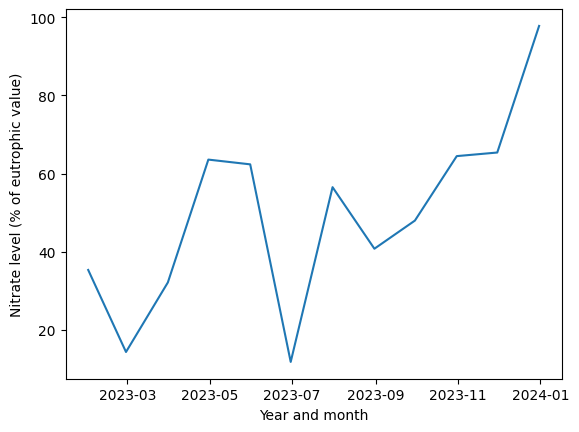

In [23]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_7098/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

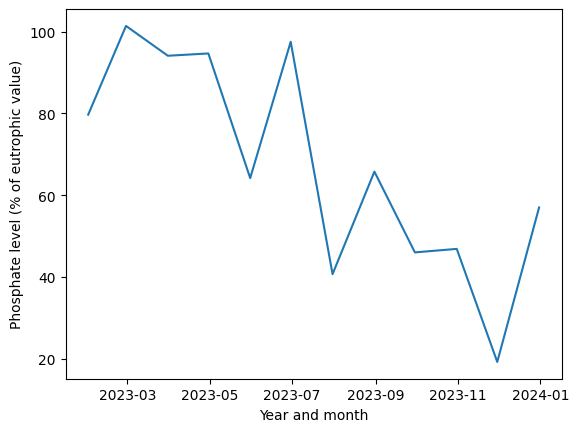

In [24]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

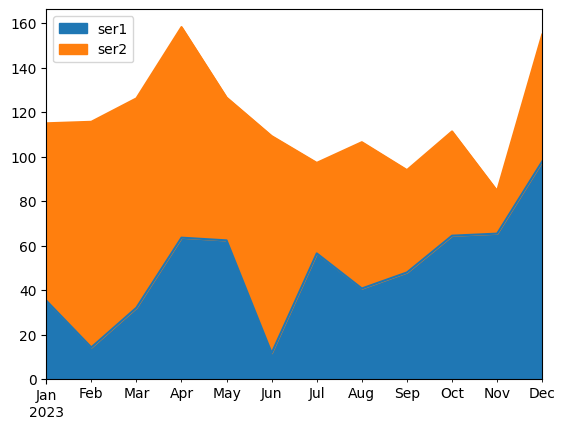

In [25]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

The advantages of showing this as an area plot is that it makes it easier to compare between the two lines/charts. However, the disadvantage of showing this way is that it is harder to see the individal values/peaks/valleys associated with the lines/charts.

The only adjustment I'd make is to make the label the min/max for each line/chart.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [26]:
df_application = pd.read_csv("Credit_Card_Application_Data.csv")

In [27]:
df_application.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [28]:
correlation_matrix = df_application.corr(numeric_only=True)

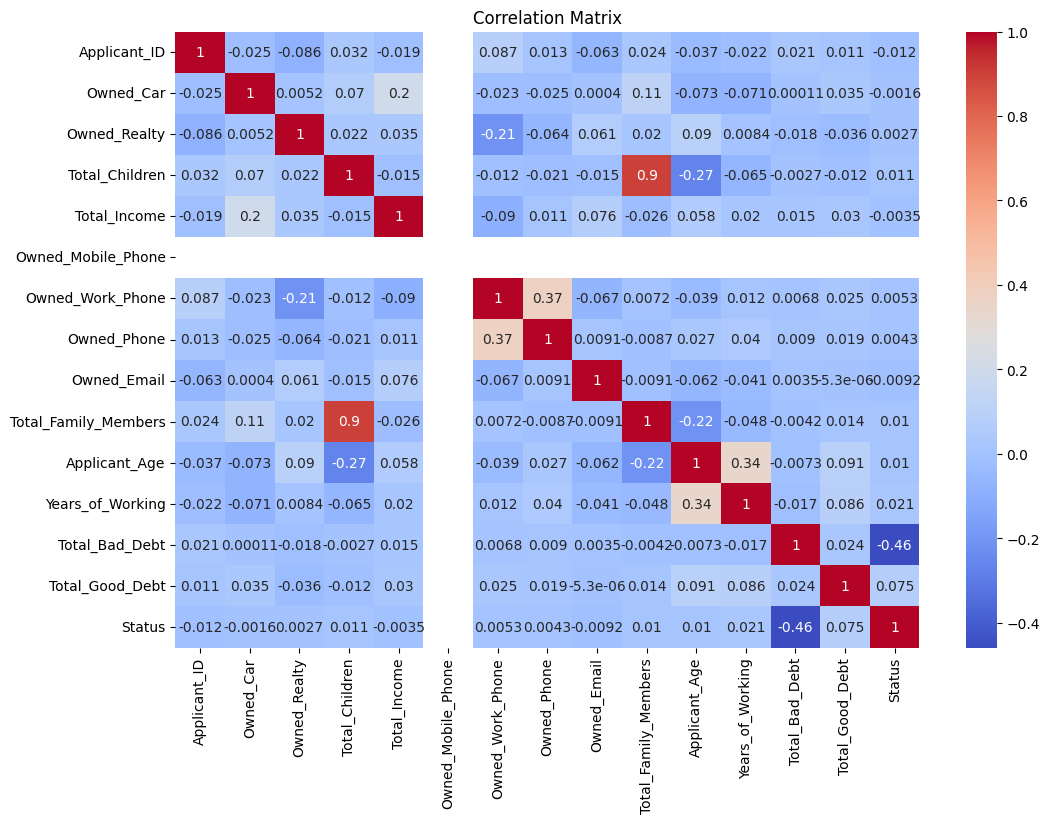

In [29]:
plt.figure(figsize=(12, 8))  

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

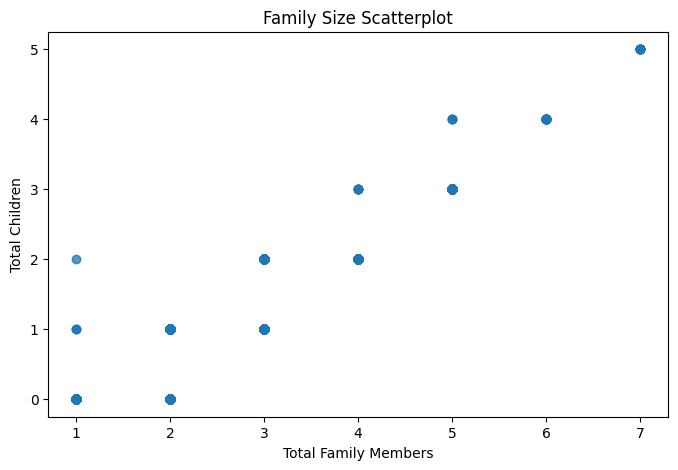

In [30]:
# Making a scatterplot for total family members and total children
# The correlation matrix shows high correlation
# Which is expected given the dependent nature

plt.figure(figsize=(8, 5))
plt.scatter(df_application['Total_Family_Members'], df_application['Total_Children'], alpha=0.5)
plt.xlabel('Total Family Members')
plt.ylabel('Total Children')
plt.title('Family Size Scatterplot')
plt.show()

Conclusions:

While I expected the correlation between Total Family Members and Total Children shown above, I did not expect the low level of correlation between pairs of other variables seen in the correlation matrix. This data is usable.

I did not identify any outliers.

The variables are not highly correlated with one another, therefore, I do not believe they are redundant. The only item that may be redundant is either the Total Family Size or Total Children field.

Based on this dataset, I do not believe there are any confounding variables.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

In [32]:
df_fraud = pd.read_csv("Fraud_Detection_Data_Train_sampled.csv")

In [33]:
df_fraud.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0
1,547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,...,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0
2,110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,...,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0
3,1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0
4,271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,...,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0


/tmp/ipykernel_7098/1242052114.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df_fraud.groupby(['Month', 'is_fraud']).size().unstack(fill_value=0)


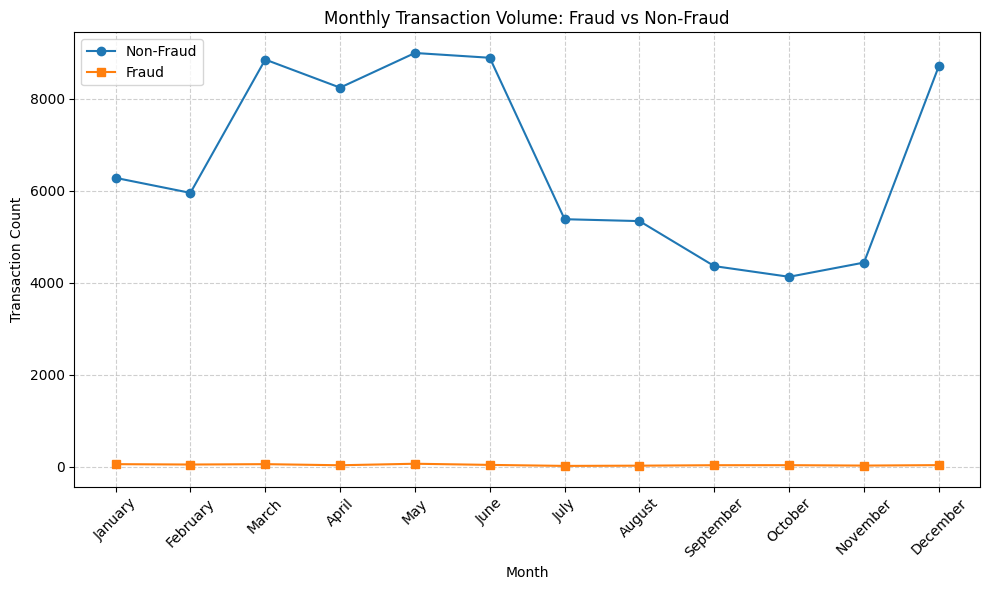

In [35]:
# Convert 'trans_date_trans_time' to datetime
df_fraud['trans_date_trans_time'] = pd.to_datetime(df_fraud['trans_date_trans_time'])

# Extract month name
df_fraud['Month'] = df_fraud['trans_date_trans_time'].dt.strftime('%B')

# Calendar year order instead of alphabetical order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_fraud['Month'] = pd.Categorical(df_fraud['Month'], categories=month_order, ordered=True)

# Group by Month and Class (0 = Non-Fraud, 1 = Fraud)
monthly_counts = df_fraud.groupby(['Month', 'is_fraud']).size().unstack(fill_value=0)
monthly_counts.columns = ['Non-Fraud', 'Fraud']

# Sort by month order
monthly_counts = monthly_counts.sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts['Non-Fraud'], marker='o', label='Non-Fraud')
plt.plot(monthly_counts.index, monthly_counts['Fraud'], marker='s', label='Fraud')

# Styling to match charts on pages 92-93
plt.title('Monthly Transaction Volume: Fraud vs Non-Fraud')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()